#Recommender System with Surprise

### surprise - Simple Python Recommendation System Engine

- https://github.com/yzzhang/machine-learning/blob/master/recommender/netflix-demo.ipynb
- https://towardsdatascience.com/machine-learning-for-building-recommender-system-in-python-9e4922dd7e97
- Hướng dẫn chi tiết: https://surprise.readthedocs.io/en/stable/getting_started.html
- http://surpriselib.com/
- List of Support Algorithms in **surprise** package:

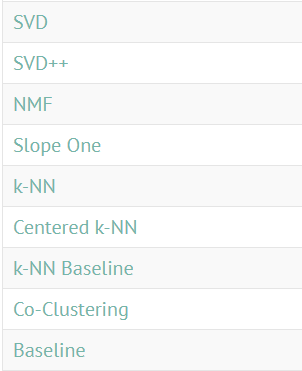

In [1]:
!pip install surprise

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/MyDrive/COMPUTER SCIENCE/CSC_Courses/0.MDS0_Capstone/LDS0_K292_Online_PhamQuocThai/Project_2'

Mounted at /content/gdrive
/content/gdrive/MyDrive/COMPUTER SCIENCE/CSC_Courses/0.MDS0_Capstone/LDS0_K292_Online_PhamQuocThai/Project_2


In [3]:
import pandas as pd
import numpy as np
# from surprise import Reader, Dataset, SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNBaseline, KNNWithMeans, KNNWithZScore, CoClustering, BaselineOnly
#from surprise import *
from surprise.model_selection.validation import cross_validate

from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import train_test_split

In [4]:
df = pd.read_csv("cleaned_data/Products_ThoiTrangNam_rating_clean.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024482 entries, 0 to 1024481
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   product_id  1024482 non-null  int64 
 1   user_id     1024482 non-null  int64 
 2   user        1024482 non-null  object
 3   rating      1024482 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 31.3+ MB


In [6]:
#df['product_id'] = df['product_id'].astype('int8')
#df['user_id'] = df['user_id'].astype('int8')
#df['rating'] = df['rating'].astype('float16')

In [7]:
df.head()

,product_id,user_id,user,rating
0,190,1,karmakyun2nd,5
1,190,2,tranquangvinh_vv,5
2,190,3,nguyenquoctoan2005,5
3,190,4,nguyenthuyhavi,5
4,190,5,luonganh5595,5


In [8]:
n_ratings = len(df)
n_movies = len(df['product_id'].unique())
n_users = len(df['user_id'].unique())

In [9]:
display(n_ratings, n_movies, n_users)

1024482

31267

650636

In [10]:
df['product_id'].value_counts()

1731      412
177       395
231       391
17194     389
2359      387
         ... 
121331      1
121330      1
121328      1
121326      1
26899       1
Name: product_id, Length: 31267, dtype: int64

In [11]:
# https://surprise.readthedocs.io/en/stable/reader.html
reader = Reader()
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

In [15]:
# Define similarity measure
sim_options = {'name': 'cosine', 'user_based': True}

# Split dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Build and train model
#model = KNNBasic(sim_options=sim_options)
model = SVD()
model.fit(trainset)

# Make recommendations for a specific user (replace 'user_id' with the desired user ID)
user_id = 1
# Get items the user hasn't rated yet
items_to_predict = [item_id for item_id in data.build_full_trainset().all_items() if item_id not in trainset.ur[trainset.to_inner_uid(user_id)]]
# Predict ratings for the items
predictions = [model.predict(user_id, item_id) for item_id in items_to_predict]
# Sort predictions by estimated rating
top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:10]

# Print top recommendations
for prediction in top_n:
    print('Item ID:', prediction.iid, 'Estimated rating:', prediction.est)


Item ID: 104 Estimated rating: 5
Item ID: 153 Estimated rating: 5
Item ID: 162 Estimated rating: 5
Item ID: 1011 Estimated rating: 5
Item ID: 1017 Estimated rating: 5
Item ID: 1024 Estimated rating: 5
Item ID: 1025 Estimated rating: 5
Item ID: 1026 Estimated rating: 5
Item ID: 1027 Estimated rating: 5
Item ID: 1029 Estimated rating: 5


In [16]:
# https://www.youtube.com/watch?v=8wLKuscyO9I
# Singular value decomposition
algorithm = SVD()
#algorithm = KNNBasic()
#Run 5-fold cross-validation and print results
results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8806  0.8797  0.8813  0.8786  0.8793  0.8799  0.0009  
MAE (testset)     0.5598  0.5599  0.5593  0.5581  0.5574  0.5589  0.0010  
Fit time          17.67   18.02   18.55   18.51   18.13   18.18   0.33    
Test time         2.90    1.10    1.11    1.14    1.00    1.45    0.73    


In [17]:
results

{'test_rmse': array([0.88056536, 0.87970535, 0.88126705, 0.87856147, 0.87928961]),
 'test_mae': array([0.55978302, 0.55993771, 0.55932297, 0.55811778, 0.557388  ]),
 'fit_time': (17.665936946868896,
  18.02358317375183,
  18.554624795913696,
  18.50905179977417,
  18.132914543151855),
 'test_time': (2.8990285396575928,
  1.0998523235321045,
  1.1073429584503174,
  1.1376926898956299,
  0.999748945236206)}

In [18]:
# If the results are OK => getting full dataset => fit model
trainset = data.build_full_trainset()
algorithm.fit(trainset)

### Recommender for a specific user

In [19]:
# userId = 27 has seen some movies:
userId = 27
df_select = df[(df['user_id'] == userId) & (df['rating'] >=3)]
df_select = df_select.set_index('product_id')
#df_select = df_select.join(df_title)['Name']
df_select.head(df_select.shape[0])

,user_id,user,rating
product_id,,,
190,27,huyen170691,5


In [20]:
df_select.shape

(1, 3)

In [21]:
df_score = df[["product_id"]]

In [22]:
df_score

,product_id
0,190
1,190
2,190
3,190
4,190
...,...
1024477,171107
1024478,171107
1024479,171107
1024480,171107


- Once the model has been evaluated to our satisfaction, then we can re-train the model using the entire training dataset

In [23]:
# The following are the top 5 movies to be recommended to the user with userId
# To recommend products (i.e., movies) to the given user,
# we can sort the list of movies in decreasing order of predicted ratings
# and take the top N movies as recommendations:
df_score['EstimateScore'] = df_score['product_id'].apply(lambda x: algorithm.predict(userId, x).est) # est: get EstimateScore
df_score = df_score.sort_values(by=['EstimateScore'], ascending=False)

<ipython-input-23-aed8c273f3bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['EstimateScore'] = df_score['product_id'].apply(lambda x: algorithm.predict(userId, x).est) # est: get EstimateScore


In [24]:
df_score = df_score.drop_duplicates()

In [25]:
df_score.head()

,product_id,EstimateScore
644305,12379,5.0
530065,25237,5.0
529897,25235,5.0
321681,231176,5.0
125054,21775,5.0


In [26]:
df_score[df_score.EstimateScore>=3]

,product_id,EstimateScore
644305,12379,5.000000
530065,25237,5.000000
529897,25235,5.000000
321681,231176,5.000000
125054,21775,5.000000
...,...,...
295522,2359,3.030350
219923,18318,3.028572
78073,2181,3.018304
266471,18943,3.005924


In [ ]:
!